# Retail-Strategy-Analytics

## Data Preparation and Customer Analytics

### 1. Load required libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# 设置绘图风格
sns.set_theme(style="whitegrid")

# 设置 Pandas 显示选项，防止列过多时被折叠
pd.set_option('display.max_columns', None)

print("Libraries loaded.")

Libraries loaded.


In [2]:
# 读取交易数据和顾客行为数据
transactionData = pd.read_csv("QVI_transaction_data.csv")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

# 检查读取是否成功
print("Datasets loaded.")

Datasets loaded.


### 2. Exploratory data analysis

In [3]:
# 查看数据结构 (列名、非空计数、数据类型)
print("--- Data Structure (Info) ---")
transactionData.info()

# 查看前几行数据
print("\n--- First few rows ---")
print(transactionData.head())

--- Data Structure (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB

--- First few rows ---
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2         

In [4]:
# 将整数日期转换为 datetime 格式
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit='D', origin='1899-12-30')

# 再次检查转换后的 DATE 列和前几行数据
print("--- Converted Date Column ---")
print(transactionData[['DATE']].head())

# 验证数据类型是否已变为 datetime
print(f"\nNew Date Type: {transactionData['DATE'].dtype}")

--- Converted Date Column ---
        DATE
0 2018-10-17
1 2019-05-14
2 2019-05-20
3 2018-08-17
4 2018-08-18

New Date Type: datetime64[ns]


### 3. Text Analysis and Data Cleaning

In [5]:
# 查看产品名称的摘要
print("--- Product Name Summary ---")
print(transactionData['PROD_NAME'].value_counts().head(20))

--- Product Name Summary ---
PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Tyrrells Crisps     Lightly Sa

In [6]:
import re
from collections import Counter

# 1. 将所有产品名称合并为一个字符串，并按空格分割成单词列表
all_words = ' '.join(transactionData['PROD_NAME']).split()

# 转换为 Series 以便处理
words_series = pd.Series(all_words)

# 2. 移除包含数字的单词 (Removing digits)
words_no_digits = words_series[~words_series.str.contains(r'\d', regex=True)]

# 3. 移除特殊字符 (只保留包含字母的单词)
# 这里我们使用正则去除完全由符号组成的项，并简单清洗
clean_words = words_no_digits[words_no_digits.str.contains(r'[a-zA-Z]', regex=True)]

# 4. 统计最常见的单词 (Count frequencies)
word_counts = clean_words.value_counts().reset_index()
word_counts.columns = ['Word', 'Frequency']

print("--- Top 20 Most Common Words ---")
print(word_counts.head(20))

--- Top 20 Most Common Words ---
        Word  Frequency
0      Chips      49770
1     Kettle      41288
2     Smiths      28860
3       Salt      27976
4     Cheese      27890
5   Pringles      25102
6    Doritos      24962
7    Crinkle      23960
8       Corn      22063
9   Original      21560
10       Cut      20754
11      Chip      18645
12     Salsa      18094
13   Chicken      15407
14       Sea      14145
15     Thins      14075
16      Sour      13882
17    Crisps      12607
18   Vinegar      12402
19    Chilli      12389


In [7]:
# 找出包含 "salsa" 的产品 (不区分大小写)
is_salsa = transactionData['PROD_NAME'].str.contains('salsa', case=False)

# 打印移除前的行数
print(f"Total rows before removing Salsa: {len(transactionData)}")

# 过滤掉 Salsa 产品
transactionData = transactionData[~is_salsa]

# 打印移除后的行数
print(f"Total rows after removing Salsa: {len(transactionData)}")

Total rows before removing Salsa: 264836
Total rows after removing Salsa: 246742


In [8]:
# 检查统计摘要，寻找空值或异常值
print("--- Summary Statistics ---")
print(transactionData.describe())

# 检查是否有空值
print("\n--- Missing Values Check ---")
print(transactionData.isnull().sum())

--- Summary Statistics ---
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000 

### 4. Outlier Detection and Removal

#### Visualising the outlier

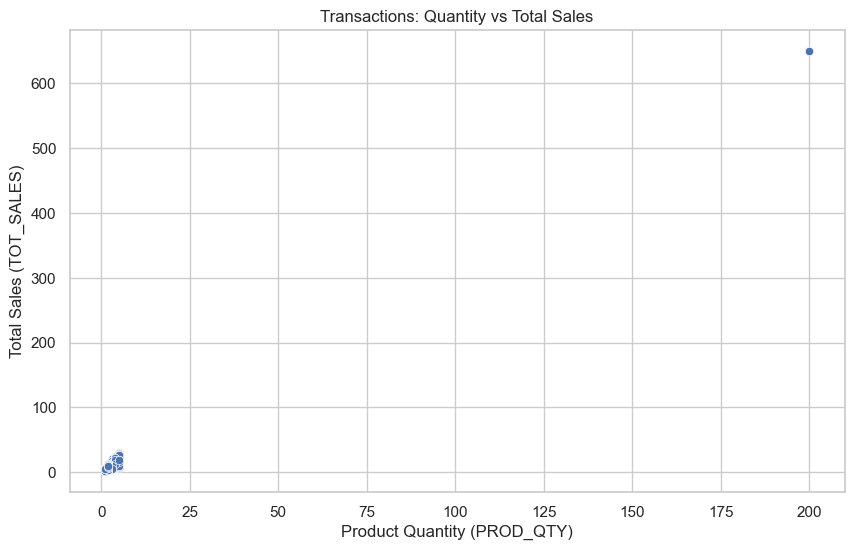

In [9]:
# 绘制散点图查看数量分布
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactionData, x='PROD_QTY', y='TOT_SALES')

plt.title("Transactions: Quantity vs Total Sales")
plt.xlabel("Product Quantity (PROD_QTY)")
plt.ylabel("Total Sales (TOT_SALES)")
plt.show()

In [10]:
# 筛选出购买数量为 200 的交易
outlier_transactions = transactionData[transactionData['PROD_QTY'] == 200]
print("--- Outlier Transactions ---")
print(outlier_transactions)

--- Outlier Transactions ---
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [11]:
# 检查该客户的其他交易
customer_226000 = transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]
print("\n--- All Transactions by Customer 226000 ---")
print(customer_226000)


--- All Transactions by Customer 226000 ---
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [12]:
# 移除卡号为 226000 的客户数据
transactionData = transactionData[transactionData['LYLTY_CARD_NBR'] != 226000]

# 重新检查统计摘要，确认异常值已被移除
print("--- Summary after removing outlier ---")
print(transactionData.describe())

--- Summary after removing outlier ---
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000    

### 5. Time Series Analysis

In [13]:
# 按日期分组并统计交易数量
transactions_by_day = transactionData.groupby('DATE').size().reset_index(name='N')


print("--- Transactions by Day ---")
print(transactions_by_day.head())
print(f"\nTotal unique dates: {len(transactions_by_day)}")

--- Transactions by Day ---
        DATE    N
0 2018-07-01  663
1 2018-07-02  650
2 2018-07-03  674
3 2018-07-04  669
4 2018-07-05  660

Total unique dates: 364


In [14]:
# 创建从 2018-07-01 到 2019-06-30 的完整日期序列
all_dates = pd.DataFrame({
    'DATE': pd.date_range(start="2018-07-01", end="2019-06-30")
})

# 将完整日期序列与交易数据进行左连接 (Left Join)
transactions_by_day = pd.merge(all_dates, transactions_by_day, on='DATE', how='left')

# 将缺失值 (NaN) 填充为 0
transactions_by_day['N'] = transactions_by_day['N'].fillna(0)

print("--- Transactions by Day (Full Sequence) ---")
print(transactions_by_day.head())

--- Transactions by Day (Full Sequence) ---
        DATE      N
0 2018-07-01  663.0
1 2018-07-02  650.0
2 2018-07-03  674.0
3 2018-07-04  669.0
4 2018-07-05  660.0


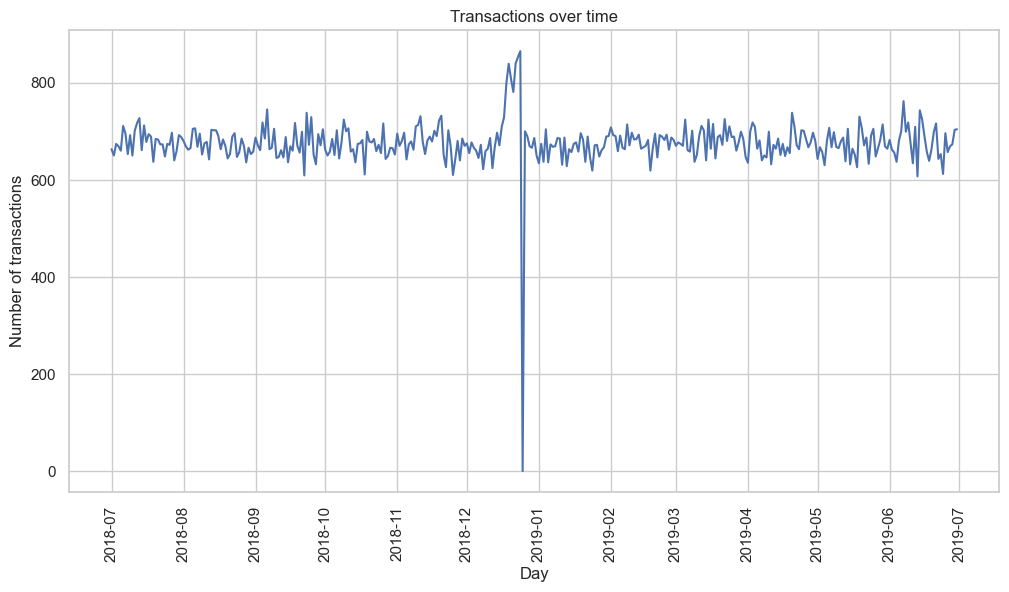

In [15]:
# 绘制全年的交易次数折线图
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_by_day, x='DATE', y='N')

plt.title("Transactions over time")
plt.xlabel("Day")
plt.ylabel("Number of transactions")

# 设置 X 轴刻度格式，使其更易读
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

plt.show()

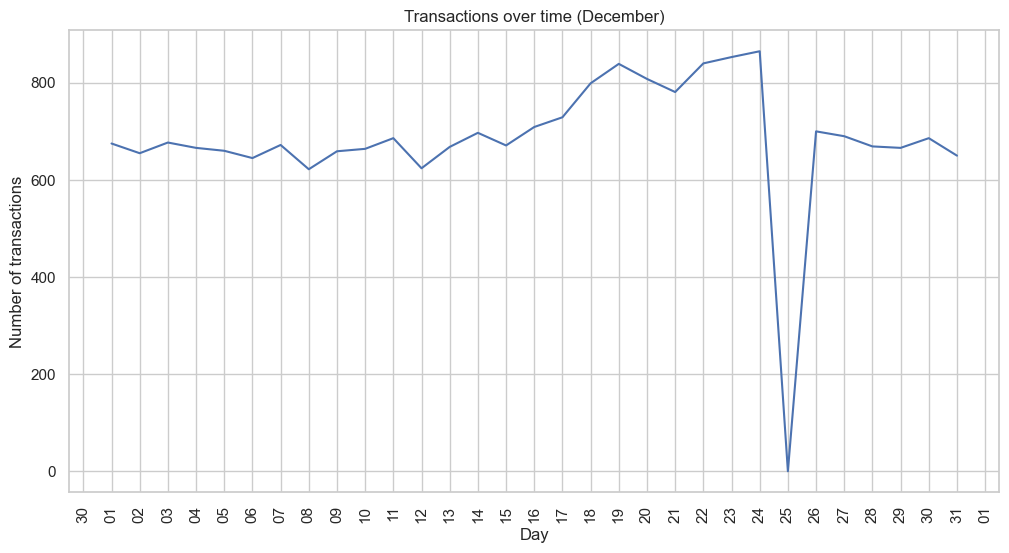

In [16]:
# 筛选 12 月的数据
december_data = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# 绘制 12 月的交易图
plt.figure(figsize=(12, 6))
sns.lineplot(data=december_data, x='DATE', y='N')

plt.title("Transactions over time (December)")
plt.xlabel("Day")
plt.ylabel("Number of transactions")

# 设置 X 轴为按天显示
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.xticks(rotation=90)

plt.show()

### 6. Feature Engineering: Pack Size

In [17]:
# 从产品名称中提取数字作为包装大小
# Python 中我们使用正则表达式提取数字
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract('(\d+)').astype(float)

# 检查提取出的包装大小及其频次，看看是否合理
pack_size_counts = transactionData['PACK_SIZE'].value_counts().sort_index().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'N']

print("--- Pack Size Frequency ---")
print(pack_size_counts)

--- Pack Size Frequency ---
    PACK_SIZE      N
0        70.0   1507
1        90.0   3008
2       110.0  22387
3       125.0   1454
4       134.0  25102
5       135.0   3257
6       150.0  40203
7       160.0   2970
8       165.0  15297
9       170.0  19983
10      175.0  66390
11      180.0   1468
12      190.0   2995
13      200.0   4473
14      210.0   6272
15      220.0   1564
16      250.0   3169
17      270.0   6285
18      330.0  12540
19      380.0   6416


### 7. Visualising Pack Size

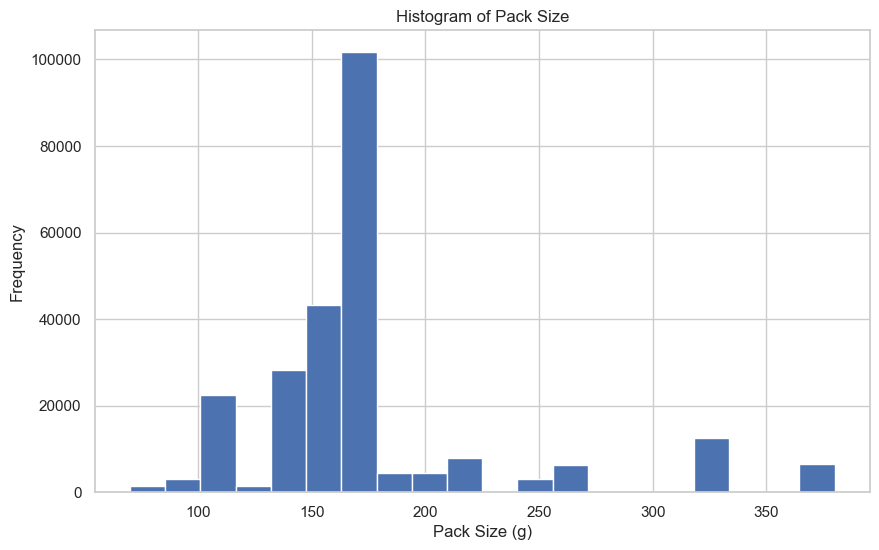

In [18]:
# 绘制包装大小的直方图
plt.figure(figsize=(10, 6))
plt.hist(transactionData['PACK_SIZE'], bins=20)

plt.title("Histogram of Pack Size")
plt.xlabel("Pack Size (g)")
plt.ylabel("Frequency")

plt.show()

### 8. Feature Engineering: Brand Name

In [19]:
# 提取产品名称的第一个单词作为品牌，并转换为大写
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split().str[0].str.upper()

# 检查提取出的品牌及其频次
print("--- Top 20 Brands (Before Cleaning) ---")
print(transactionData['BRAND'].value_counts().head(20))

--- Top 20 Brands (Before Cleaning) ---
BRAND
KETTLE       41288
SMITHS       27390
PRINGLES     25102
DORITOS      22041
THINS        14075
RRD          11894
INFUZIONS    11057
WW           10320
COBS          9693
TOSTITOS      9471
TWISTIES      9454
TYRRELLS      6442
GRAIN         6272
NATURAL       6050
CHEEZELS      4603
CCS           4551
RED           4427
DORITO        3183
INFZNS        3144
SMITH         2963
Name: count, dtype: int64


清洗品牌名称 (Clean Brand Names)
观察上面的品牌列表，我们会发现有些品牌名称实际上是指同一个品牌，只是拼写不同。例如：

RED 和 RRD 都是 "Red Rock Deli"。

SNBTS 和 SUNBITES 都是 "Sunbites"。

WW 和 WOOLWORTHS 都是 "Woolworths"。

为了保证分析准确，我们需要将这些重复的项合并。

In [20]:
# 定义品牌映射字典
brand_corrections = {
    "RED": "RRD",
    "SNBTS": "SUNBITES",
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITO": "DORITOS",
    "GRAIN": "GRNWVES"
}

# 替换品牌名称
transactionData['BRAND'] = transactionData['BRAND'].replace(brand_corrections)

# 再次检查清洗后的品牌频次
print("--- Brands (After Cleaning) ---")
brand_counts = transactionData['BRAND'].value_counts().sort_index().reset_index()
brand_counts.columns = ['BRAND', 'N']
brand_counts = brand_counts.sort_values('N', ascending=False)
print(brand_counts)

--- Brands (After Cleaning) ---
         BRAND      N
9       KETTLE  41288
13      SMITHS  30353
5      DORITOS  25224
11    PRINGLES  25102
12         RRD  16321
8    INFUZIONS  14201
15       THINS  14075
19  WOOLWORTHS  11836
4         COBS   9693
16    TOSTITOS   9471
17    TWISTIES   9454
7      GRNWVES   7740
10     NATURAL   7469
18    TYRRELLS   6442
3     CHEEZELS   4603
1          CCS   4551
14    SUNBITES   3008
2      CHEETOS   2927
0       BURGER   1564
6       FRENCH   1418


### 9. Examining Customer Data

在对交易数据 (`transactionData`) 感到满意后，让我们来看看顾客数据 (`customerData`)。

#### Data Structure

In [21]:
# 查看顾客数据的基本信息
print("--- Customer Data Info ---")
customerData.info()

print("\n--- Customer Data Summary ---")
print(customerData.describe(include='object')) # 查看非数值列的统计

--- Customer Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

--- Customer Data Summary ---
       LIFESTAGE PREMIUM_CUSTOMER
count      72637            72637
unique         7                3
top     RETIREES       Mainstream
freq       14805            29245


In [22]:
# 统计各人生阶段的顾客数量，并降序排列
print("--- Lifestage Distribution ---")
lifestage_counts = customerData['LIFESTAGE'].value_counts().sort_values(ascending=False)
print(lifestage_counts)

# 统计各客户等级的顾客数量，并降序排列
print("\n--- Premium Customer Distribution ---")
premium_counts = customerData['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False)
print(premium_counts)

--- Lifestage Distribution ---
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

--- Premium Customer Distribution ---
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


数据没有问题，我们将交易数据和客户数据合并。

In [23]:
# 将交易数据与顾客数据合并 (Left Join)
data = pd.merge(transactionData, customerData, on='LYLTY_CARD_NBR', how='left')

# 检查合并后的行数是否与原交易数据一致
print(f"Transaction Data Rows: {len(transactionData)}")
print(f"Merged Data Rows: {len(data)}")

Transaction Data Rows: 246740
Merged Data Rows: 246740


In [24]:
# 检查 LIFESTAGE 列是否有空值
missing_lifestage = data['LIFESTAGE'].isnull().sum()
print(f"Missing Lifestage values: {missing_lifestage}")

# 检查 PREMIUM_CUSTOMER 列是否有空值
missing_premium = data['PREMIUM_CUSTOMER'].isnull().sum()
print(f"Missing Premium Customer values: {missing_premium}")

Missing Lifestage values: 0
Missing Premium Customer values: 0


In [25]:
# 导出为 CSV
data.to_csv("QVI_data.csv", index=False)
print("Data saved to QVI_data.csv")

Data saved to QVI_data.csv


### 11. Data Analysis on Customer Segments

数据已准备就绪，定义一些客户感兴趣的指标进行分析：

1.  **谁在薯片上花费最多？**（按人生阶段 `LIFESTAGE` 和会员等级 `PREMIUM_CUSTOMER` 划分的总销售额）。
2.  **每个细分群体中有多少客户？**
3.  **每个群体的客户平均购买多少薯片？**
4.  **每个群体的平均薯片单价是多少？**

### 12. 各群体销售额分析 (Total Sales by Segment)

首先，我们来计算不同客户群体的总销售额，看看哪个群体贡献了最多的销售额。

#### 计算总销售额 (Calculate Total Sales)

In [26]:
# 按 LIFESTAGE 和 PREMIUM_CUSTOMER 分组，并计算总销售额
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# 按销售额降序排列，方便查看
sales_by_segment = sales_by_segment.sort_values('TOT_SALES', ascending=False)

print("--- Total Sales by Segment (Top 10) ---")
print(sales_by_segment.head(10))

--- Total Sales by Segment (Top 10) ---
                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  156863.75
19  YOUNG SINGLES/COUPLES       Mainstream  147582.20
13               RETIREES       Mainstream  145168.95
15         YOUNG FAMILIES           Budget  129717.95
9   OLDER SINGLES/COUPLES           Budget  127833.60
10  OLDER SINGLES/COUPLES       Mainstream  124648.50
11  OLDER SINGLES/COUPLES          Premium  123537.55
12               RETIREES           Budget  105916.30
7          OLDER FAMILIES       Mainstream   96413.55
14               RETIREES          Premium   91296.65


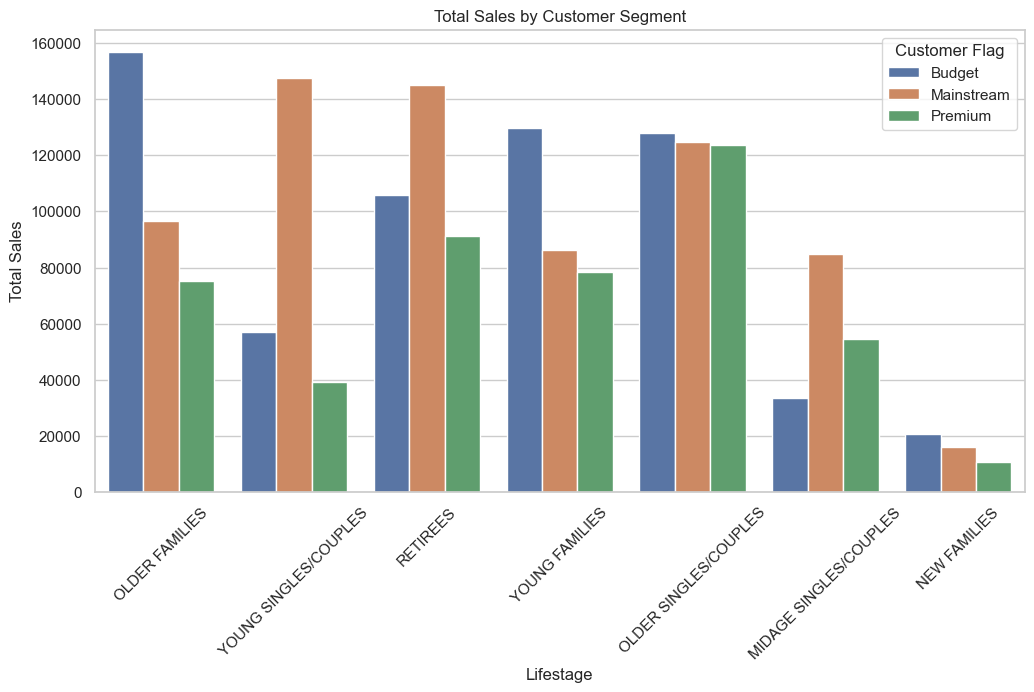

In [27]:
# 绘制分组柱状图
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

plt.title("Total Sales by Customer Segment")
plt.ylabel("Total Sales")
plt.xlabel("Lifestage")
plt.xticks(rotation=45) # 旋转 X 轴标签以免重叠
plt.legend(title="Customer Flag")

plt.show()

#### Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

### 13. Number of Customers by Segment

我们之前发现，**Mainstream - Young Singles/Couples**（主流 - 年轻单身/伴侣）和 **Mainstream - Retirees**（主流 - 退休人员）的销售额很高。现在我们要看看，这是否仅仅是因为这几类人群的**人数更多**？

#### Calculate Number of Customers

In [28]:
# 按 LIFESTAGE 和 PREMIUM_CUSTOMER 分组，并计算唯一的客户数量
customers_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_by_segment.rename(columns={'LYLTY_CARD_NBR': 'CUSTOMERS'}, inplace=True)

# 按客户数量降序排列
customers_by_segment = customers_by_segment.sort_values('CUSTOMERS', ascending=False)

print("--- Number of Customers by Segment (Top 10) ---")
print(customers_by_segment.head(10))

--- Number of Customers by Segment (Top 10) ---
                LIFESTAGE PREMIUM_CUSTOMER  CUSTOMERS
19  YOUNG SINGLES/COUPLES       Mainstream       7917
13               RETIREES       Mainstream       6358
10  OLDER SINGLES/COUPLES       Mainstream       4858
9   OLDER SINGLES/COUPLES           Budget       4849
11  OLDER SINGLES/COUPLES          Premium       4682
6          OLDER FAMILIES           Budget       4611
12               RETIREES           Budget       4385
15         YOUNG FAMILIES           Budget       3953
14               RETIREES          Premium       3812
18  YOUNG SINGLES/COUPLES           Budget       3647


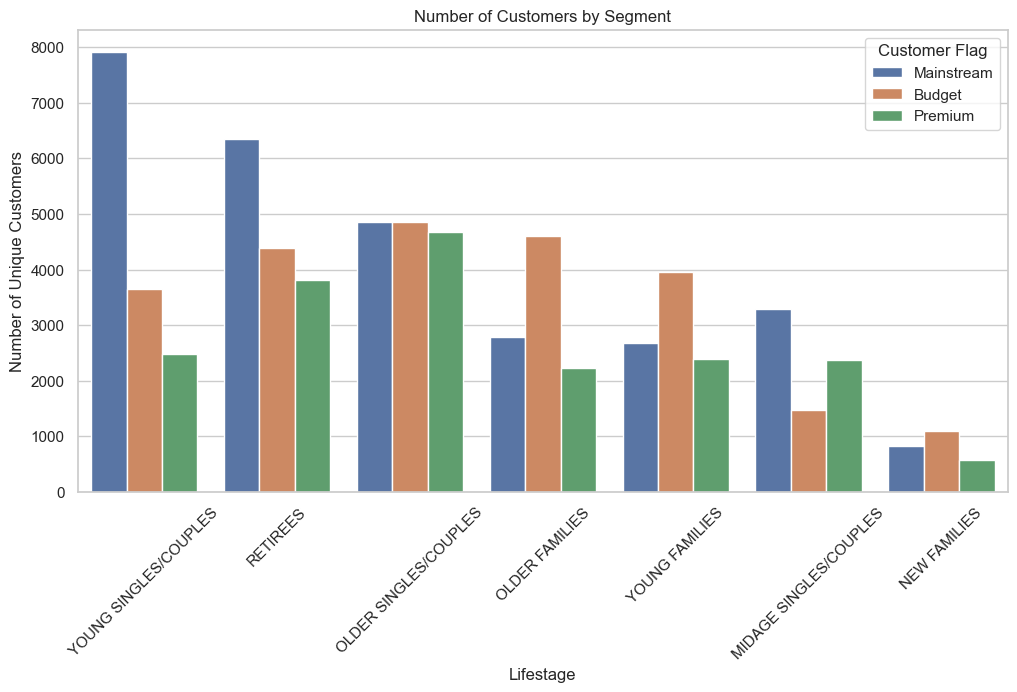

In [29]:
# 绘制分组柱状图：客户数量
plt.figure(figsize=(12, 6))
sns.barplot(data=customers_by_segment, x='LIFESTAGE', y='CUSTOMERS', hue='PREMIUM_CUSTOMER')

plt.title("Number of Customers by Segment")
plt.ylabel("Number of Unique Customers")
plt.xlabel("Lifestage")
plt.xticks(rotation=45)
plt.legend(title="Customer Flag")

plt.show()

从图中可以清楚地看到，**Mainstream - Young Singles/Couples** 和 **Mainstream - Retirees** 确实拥有最多的客户数量。这解释了为什么他们的总销售额很高——主要是由庞大的客户基数驱动的。
相比之下，**Older Families - Budget**（年长家庭 - 预算型）的客户数量虽然也多，但不如前两者突出，这暗示他们的购买行为可能有所不同（可能买得更多）。

### 14. Average Units per Customer

In [30]:
# 1. 计算各群体的总购买数量 (PROD_QTY 的总和)
# 2. 计算各群体的唯一客户数
# 3. 相除得到人均购买量

# 先聚合数据
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    TOTAL_QTY=('PROD_QTY', 'sum'),
    UNIQUE_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique')
).reset_index()

# 计算平均值
avg_units['AVG_UNITS'] = avg_units['TOTAL_QTY'] / avg_units['UNIQUE_CUSTOMERS']

# 降序排列
avg_units = avg_units.sort_values('AVG_UNITS', ascending=False)

print("--- Average Units per Customer (Top 10) ---")
print(avg_units.head(10))

--- Average Units per Customer (Top 10) ---
                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_QTY  UNIQUE_CUSTOMERS  \
7           OLDER FAMILIES       Mainstream      25804              2788   
6           OLDER FAMILIES           Budget      41853              4611   
8           OLDER FAMILIES          Premium      20239              2231   
15          YOUNG FAMILIES           Budget      34482              3953   
17          YOUNG FAMILIES          Premium      20901              2398   
16          YOUNG FAMILIES       Mainstream      23194              2685   
9    OLDER SINGLES/COUPLES           Budget      32883              4849   
11   OLDER SINGLES/COUPLES          Premium      31695              4682   
10   OLDER SINGLES/COUPLES       Mainstream      32607              4858   
1   MIDAGE SINGLES/COUPLES       Mainstream      21213              3298   

    AVG_UNITS  
7    9.255380  
6    9.076773  
8    9.071717  
15   8.722995  
17   8.716013  
16   8.638361  
9    6.

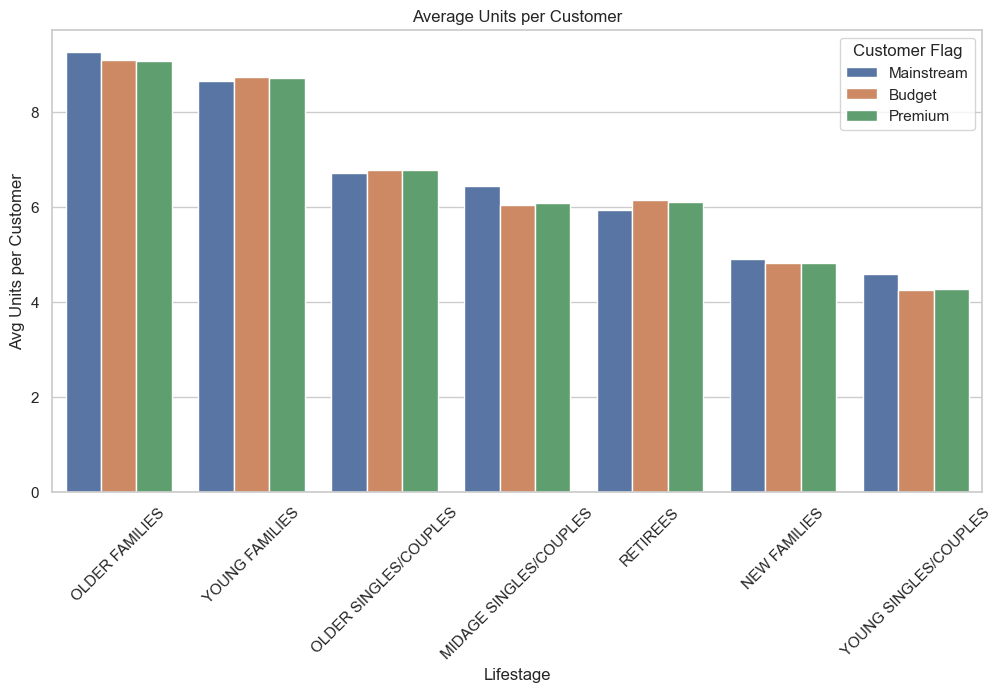

In [31]:
# 绘制分组柱状图：人均购买量
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER')

plt.title("Average Units per Customer")
plt.ylabel("Avg Units per Customer")
plt.xlabel("Lifestage")
plt.xticks(rotation=45)
plt.legend(title="Customer Flag", loc='upper right') # 图例放右上角以免遮挡

plt.show()

**Older families** and **young families** in general buy more chips per customer.

### 15. Average Price per Unit

除了购买频率，我们还想知道不同客户群体购买的薯片单价是否有差异。这有助于了解客户的价格敏感度。

#### Calculate Average Price

In [32]:
# 1. 按群体聚合，计算总销售额和总数量
price_analysis = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    TOTAL_SALES=('TOT_SALES', 'sum'),
    TOTAL_QTY=('PROD_QTY', 'sum')
).reset_index()

# 2. 计算平均单价
price_analysis['AVG_PRICE'] = price_analysis['TOTAL_SALES'] / price_analysis['TOTAL_QTY']

# 按价格降序排列
price_analysis = price_analysis.sort_values('AVG_PRICE', ascending=False)

print("--- Average Price per Unit (Top 10) ---")
print(price_analysis.head(10))

--- Average Price per Unit (Top 10) ---
                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_SALES  TOTAL_QTY  AVG_PRICE
19   YOUNG SINGLES/COUPLES       Mainstream    147582.20      36225   4.074043
1   MIDAGE SINGLES/COUPLES       Mainstream     84734.25      21213   3.994449
4             NEW FAMILIES       Mainstream     15979.70       4060   3.935887
12                RETIREES           Budget    105916.30      26932   3.932731
3             NEW FAMILIES           Budget     20607.45       5241   3.931969
14                RETIREES          Premium     91296.65      23266   3.924037
11   OLDER SINGLES/COUPLES          Premium    123537.55      31695   3.897698
9    OLDER SINGLES/COUPLES           Budget    127833.60      32883   3.887529
5             NEW FAMILIES          Premium     10760.80       2769   3.886168
13                RETIREES       Mainstream    145168.95      37677   3.852986


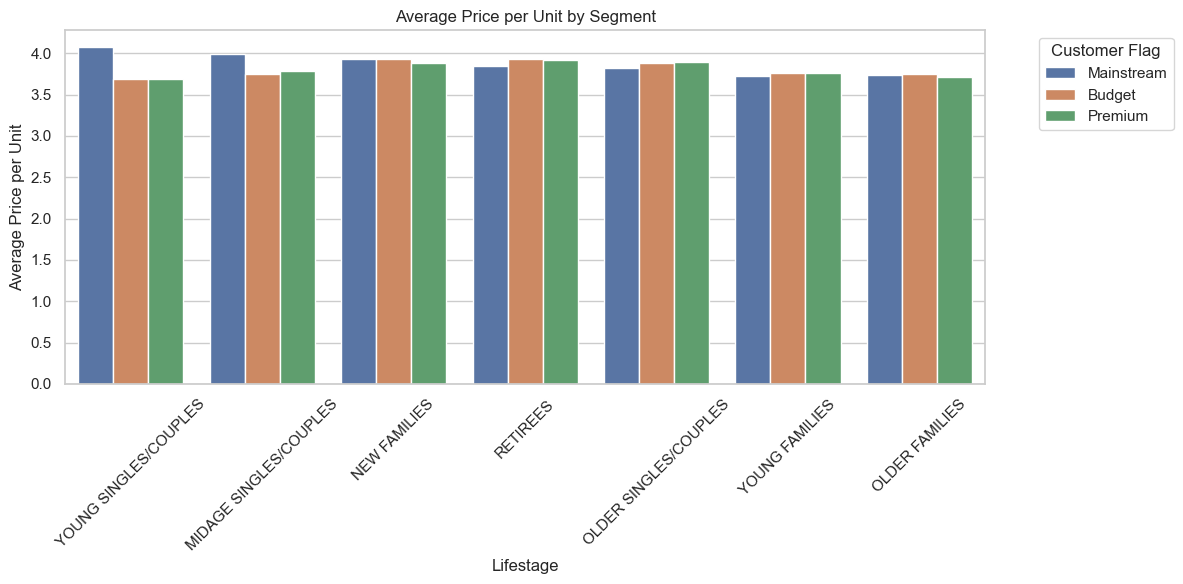

In [33]:
# 绘制分组柱状图：平均价格
plt.figure(figsize=(12, 6))
sns.barplot(data=price_analysis, x='LIFESTAGE', y='AVG_PRICE', hue='PREMIUM_CUSTOMER')

plt.title("Average Price per Unit by Segment")
plt.ylabel("Average Price per Unit")
plt.xlabel("Lifestage")
plt.xticks(rotation=45)
# 将图例移到图外，防止遮挡数据
plt.legend(title="Customer Flag", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

从图中可以看出，**Mainstream - Midage Singles/Couples**（主流 - 中年单身/伴侣）和 **Mainstream - Young Singles/Couples**（主流 - 年轻单身/伴侣）更愿意为每包薯片支付更高的价格。

### 16. Statistical Testing
虽然我们在图表中看到了价格差异，但这个差异在统计学上显著吗？我们需要进行一个独立的 t-检验（T-test）来确认这一点。

我们将对比以下两组人群的平均购买单价：

**Group 1 (Mainstream)**: 年轻和中年的单身/伴侣，且是主流客户。

**Group 2 (Other)**: 年轻和中年的单身/伴侣，但属于预算型或高端型客户

In [34]:
from scipy.stats import ttest_ind

# 首先，我们需要为每一笔交易计算单价
data['UNIT_PRICE'] = data['TOT_SALES'] / data['PROD_QTY']

# 定义目标群体 (Young & Midage Singles/Couples)
target_lifestages = ["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]

# 划分两组数据
# Group 1: Mainstream
group1 = data[
    (data['LIFESTAGE'].isin(target_lifestages)) & 
    (data['PREMIUM_CUSTOMER'] == "Mainstream")
]['UNIT_PRICE']

# Group 2: Budget & Premium (即非 Mainstream)
group2 = data[
    (data['LIFESTAGE'].isin(target_lifestages)) & 
    (data['PREMIUM_CUSTOMER'] != "Mainstream")
]['UNIT_PRICE']

# 执行 T-test (假设方差不等/Welch's t-test，方向为 greater)
# R 语言对应代码: t.test(..., alternative = "greater")
t_stat, p_val = ttest_ind(group1, group2, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 37.6243885962295
P-value: 3.4836771165090696e-306


P 值极低。这意味着我们可以自信地说：主流群体（Mainstream）的年轻/中年 单身/伴侣支付的薯片单价，在统计学上显著高于其他同龄群体。

我们完成了所有的基础指标分析。我们发现了 **Mainstream - Young Singles/Couples** 是一个非常重要的高价值群体，他们不仅人数众多，而且愿意支付更高的单价。

### 17. Deep dive into specific customer segments

我们已经发现 **Mainstream - Young Singles/Couples**（主流 - 年轻单身/伴侣）是一个极其重要的客户群体，他们的总销售额高，且愿意支付更高的单价。

为了制定更有效的策略，我们需要了解他们的具体偏好：**他们更喜欢买什么品牌的薯片？更喜欢多大的包装？**

#### Define Target and Other Segments

首先，我们将数据分为两组：
1.  **Target Segment**: Mainstream - Young Singles/Couples
2.  **Other Segment**: 其他所有客户

In [35]:
# 定义目标群体 (Mainstream - Young Singles/Couples)
target_segment = data[
    (data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
    (data['PREMIUM_CUSTOMER'] == "Mainstream")
]

# 定义对照组 (Other)
other_segment = data[
    ~((data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
      (data['PREMIUM_CUSTOMER'] == "Mainstream"))
]

# 计算两组的总购买数量
qty_target = target_segment['PROD_QTY'].sum()
qty_other = other_segment['PROD_QTY'].sum()

print(f"Target Segment Quantity: {qty_target}")
print(f"Other Segment Quantity: {qty_other}")

Target Segment Quantity: 36225
Other Segment Quantity: 434174


#### Brand Affinity
我们要计算目标群体购买某个品牌的“相对概率”。如果这个比率大于 1，说明他们比普通人更喜欢这个品牌。

In [36]:
# 1. 计算各品牌在目标群体总销量中的占比
target_brand_prop = target_segment.groupby('BRAND')['PROD_QTY'].sum() / qty_target

# 2. 计算各品牌在对照组总销量中的占比
other_brand_prop = other_segment.groupby('BRAND')['PROD_QTY'].sum() / qty_other

# 3. 合并数据并计算亲和度 (Affinity)
brand_affinity = pd.DataFrame({
    'target_prop': target_brand_prop,
    'other_prop': other_brand_prop
})

# Affinity = 目标群体占比 / 对照组占比
brand_affinity['affinity'] = brand_affinity['target_prop'] / brand_affinity['other_prop']

# 按亲和度降序排列
brand_affinity = brand_affinity.sort_values('affinity', ascending=False)

print("--- Brand Affinity (Top 10 Favorites) ---")
print(brand_affinity.head(10))

print("\n--- Brand Affinity (Bottom 5 Least Favorites) ---")
print(brand_affinity.tail(5))

--- Brand Affinity (Top 10 Favorites) ---
           target_prop  other_prop  affinity
BRAND                                       
TYRRELLS      0.031553    0.025692  1.228095
TWISTIES      0.046184    0.037877  1.219319
DORITOS       0.122761    0.101075  1.214553
KETTLE        0.197985    0.165553  1.195897
TOSTITOS      0.045411    0.037978  1.195713
PRINGLES      0.119420    0.100635  1.186670
COBS          0.044638    0.039049  1.143124
INFUZIONS     0.064679    0.057065  1.133435
THINS         0.060373    0.056986  1.059423
GRNWVES       0.032712    0.031188  1.048873

--- Brand Affinity (Bottom 5 Least Favorites) ---
            target_prop  other_prop  affinity
BRAND                                        
NATURAL        0.019600    0.030854  0.635241
CCS            0.011180    0.018896  0.591677
SUNBITES       0.006349    0.012580  0.504698
WOOLWORTHS     0.024099    0.049427  0.487573
BURGER         0.002926    0.006596  0.443597


分析结论： 根据输出结果（对应 R 报告），我们可以发现：

**Tyrrells** 的亲和度最高（约 1.23），说明 **Mainstream - Young Singles/Couples** 购买 Tyrrells 的可能性比普通人高出 **23%**。

**Burger Rings** 的亲和度最低（约 0.44），说明他们购买这个品牌的可能性比普通人低 **56%**。

#### Pack Size Affinity
同样的方法，我们可以看看他们是否偏好特定大小的包装。

In [37]:
# 1. 计算各包装在目标群体中的占比
target_pack_prop = target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum() / qty_target

# 2. 计算各包装在对照组中的占比
other_pack_prop = other_segment.groupby('PACK_SIZE')['PROD_QTY'].sum() / qty_other

# 3. 合并数据并计算亲和度
pack_affinity = pd.DataFrame({
    'target_prop': target_pack_prop,
    'other_prop': other_pack_prop
})

pack_affinity['affinity'] = pack_affinity['target_prop'] / pack_affinity['other_prop']

# 按亲和度降序排列
pack_affinity = pack_affinity.sort_values('affinity', ascending=False)

print("--- Pack Size Affinity (Top 10) ---")
print(pack_affinity.head(10))

--- Pack Size Affinity (Top 10) ---
           target_prop  other_prop  affinity
PACK_SIZE                                   
270.0         0.031829    0.025096  1.268287
380.0         0.032160    0.025584  1.257030
330.0         0.061284    0.050162  1.221717
134.0         0.119420    0.100635  1.186670
110.0         0.106280    0.089791  1.183637
210.0         0.029124    0.025121  1.159318
135.0         0.014769    0.013075  1.129511
250.0         0.014355    0.012781  1.123166
170.0         0.080773    0.080986  0.997370
150.0         0.157598    0.163421  0.964372


分析结论：

**270g** 的大包装亲和度最高（约 1.27），这意味着他们购买 **270g** 包装的可能性比普通人高 **27%**。

其次是 **380g** 和 **330g**，说明这群人倾向于购买大包装的薯片。

调查 **270g** 包装的产品
**270g** 是一个非常具体的规格，让我们看看具体是哪款产品。

In [38]:
# 查看 270g 包装对应的产品名称
product_270g = data[data['PACK_SIZE'] == 270]['PROD_NAME'].unique()
print("Products with 270g pack size:")
print(product_270g)

Products with 270g pack size:
['Twisties Cheese     270g' 'Twisties Chicken270g']


结果显示只有 **Twisties** 品牌提供 **270g** 的包装。这与我们之前的品牌分析一致（**Twisties** 的品牌亲和度也排在第二位）。

### 20. Conclusion & Recommendation
基于以上所有分析，我们可以向 Category Manager 提出具体的策略建议：

核心发现：

销售额的主要驱动力是 **Older Families (Budget)**, **Retirees (Mainstream)** 和 **Young Singles/Couples (Mainstream)**。

**Mainstream - Young Singles/Couples** 是高价值群体，因为他们人数多，且愿意支付更高的单价（可能属于冲动消费或为了娱乐社交）。

该群体对 **Tyrrells** 品牌和 **270g** 包装（**Twisties**）有极高的偏好。

行动建议：

在 **Young Singles/Couples** 经常光顾的区域（如便利店区域或特定过道），增加 **Tyrrells** 薯片和 **Twisties** 的曝光率。

考虑将这些高亲和度的产品摆放在显眼的位置，利用他们的冲动消费习惯来进一步提升销量。